In [99]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import cv2

import matplotlib.pyplot as plt

tqdm.pandas()

In [91]:
label_path = "/run/media/viper/LSP/Dataset/RAF-DB/basic/EmoLabel/list_patition_label.txt"
df = pd.read_csv(label_path, sep=" ", header=None)
df.columns = ["fr", "label"];

In [92]:
def origin_path(row):
    return "/run/media/viper/LSP/Dataset/RAF-DB/basic/Image/original/" + row

def align_path(row):
    return "/run/media/viper/LSP/Dataset/RAF-DB/basic/Image/aligned/" + row.split('.')[0] + '_aligned.' + row.split('.')[1]

def get_hw(row):
    img = cv2.imread(row)
    return f"{img.shape[0]},{img.shape[1]},{img.shape[2]}"

In [93]:
df["aligned_fr"] = df["fr"].progress_apply(align_path)


100%|██████████| 15339/15339 [00:00<00:00, 611964.40it/s]


In [94]:
df["hw"] = df["aligned_fr"].progress_apply(get_hw)

100%|██████████| 15339/15339 [00:12<00:00, 1244.19it/s]


In [95]:
target = '100,100,3'
outlier = 0
for i in tqdm(range(len(df))):
    if df.iloc[i]["hw"] != target:
        outlier += 1
print(outlier)

100%|██████████| 15339/15339 [00:01<00:00, 10830.90it/s]

0


In [160]:
X = np.zeros((len(df), 3, 100, 100))

In [161]:
for i in tqdm(range(len(df))):
    img = cv2.imread(df.iloc[i]["aligned_fr"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.transpose(2, 0, 1)
    X[i,:,:,:] = img

100%|██████████| 15339/15339 [00:15<00:00, 983.71it/s] 


In [164]:
img = X[100,:,:,:]
img = img.transpose(1,2,0)

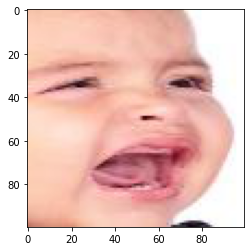

In [165]:
plt.imshow(img.astype(np.uint8))

In [167]:
np.save("/run/media/viper/LSP/Dataset/RAF-DB/basic/numpy/X.npy", X, allow_pickle=True)

In [169]:
Y = pd.get_dummies(df["label"])

In [171]:
Y_np = Y.to_numpy()

In [173]:
np.save("/run/media/viper/LSP/Dataset/RAF-DB/basic/numpy/Y.npy", Y_np, allow_pickle=True)